In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Business Understading

## Data Understading

### Read in the Data

In [252]:
# load dataset
data = pd.read_csv('Dataset/Incident_Management_CSV.csv', sep=';')

In [253]:
data.head()

,Case ID,Variant,Priority,Reporter,Timestamp,Event,Issue Type,Resolver,Report Channel,Short Description,Customer Satisfaction
0,INC0001,Variant 4,Medium,Alice,17/11/2023 11:17,Ticket created,Performance Issue,NaN,Website,Application crash,3
1,INC0001,Variant 4,Medium,Alice,17/11/2023 13:30,Ticket assigned to level 1 support,Performance Issue,Sam,Website,Application crash,3
2,INC0001,Variant 4,Medium,Alice,17/11/2023 14:06,WIP - level 1 support,Performance Issue,Sam,Website,Application crash,3
3,INC0001,Variant 4,Medium,Alice,17/11/2023 16:52,Level 1 escalates to level 2 support,Performance Issue,Michael,Website,Application crash,3
4,INC0001,Variant 4,Medium,Alice,17/11/2023 18:07,WIP - level 2 support,Performance Issue,Emma,Website,Application crash,3


### Understand Features

In [254]:
# number of rows and columns
data.shape

(242901, 11)

In [255]:
# describe data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242901 entries, 0 to 242900
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Case ID                242901 non-null  object
 1   Variant                242901 non-null  object
 2   Priority               242901 non-null  object
 3   Reporter               242901 non-null  object
 4   Timestamp              242901 non-null  object
 5   Event                  242901 non-null  object
 6   Issue Type             242901 non-null  object
 7   Resolver               146405 non-null  object
 8   Report Channel         242901 non-null  object
 9   Short Description      242901 non-null  object
 10  Customer Satisfaction  242901 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 20.4+ MB


,Customer Satisfaction
count,242901.000000
mean,3.233828
std,1.161075
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


In [256]:
# count null values in each column
print(data.isnull().sum().sort_values())

Case ID                      0
Variant                      0
Priority                     0
Reporter                     0
Timestamp                    0
Event                        0
Issue Type                   0
Report Channel               0
Short Description            0
Customer Satisfaction        0
Resolver                 96496
dtype: int64


In [257]:
# percentage of missing values in each column
print(data.isna().mean().sort_values().round(4) * 100)

Case ID                   0.00
Variant                   0.00
Priority                  0.00
Reporter                  0.00
Timestamp                 0.00
Event                     0.00
Issue Type                0.00
Report Channel            0.00
Short Description         0.00
Customer Satisfaction     0.00
Resolver                 39.73
dtype: float64


In [258]:
# check for unique values in all columns
data.nunique(dropna=True).sort_values()

Priority                      3
Report Channel                4
Reporter                      5
Customer Satisfaction         5
Issue Type                    7
Short Description             8
Resolver                      9
Variant                      13
Event                        18
Case ID                   31588
Timestamp                194657
dtype: int64

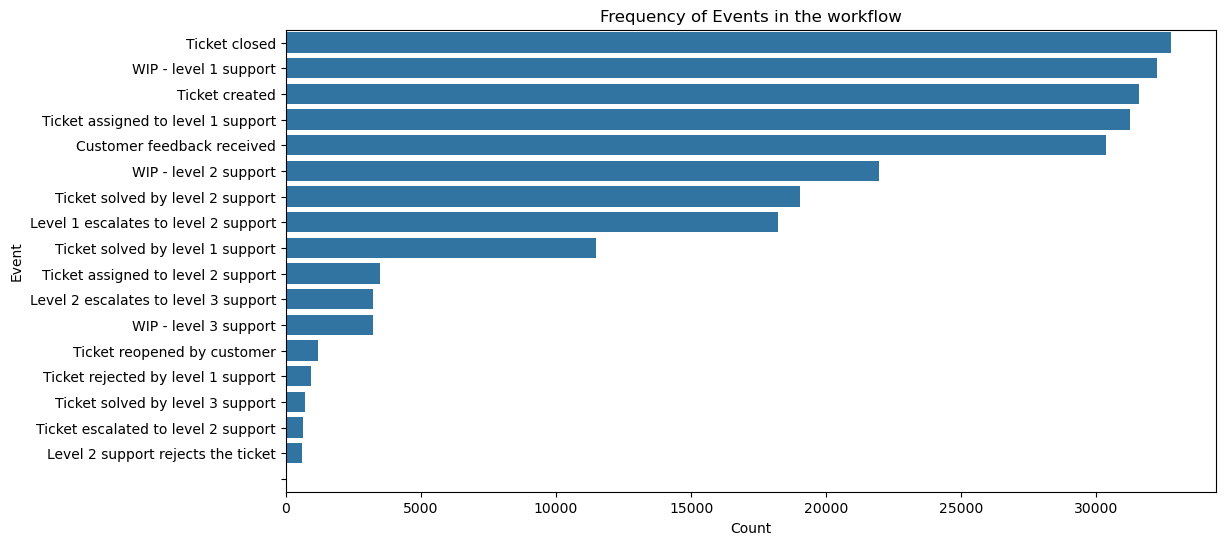

In [259]:
# Count of Events 
plt.figure(figsize=(12,6))
sns.countplot(data=data, y='Event', order=data['Event'].value_counts().index)
plt.title('Frequency of Events in the workflow')
plt.xlabel('Count')
plt.ylabel('Event')
plt.show()

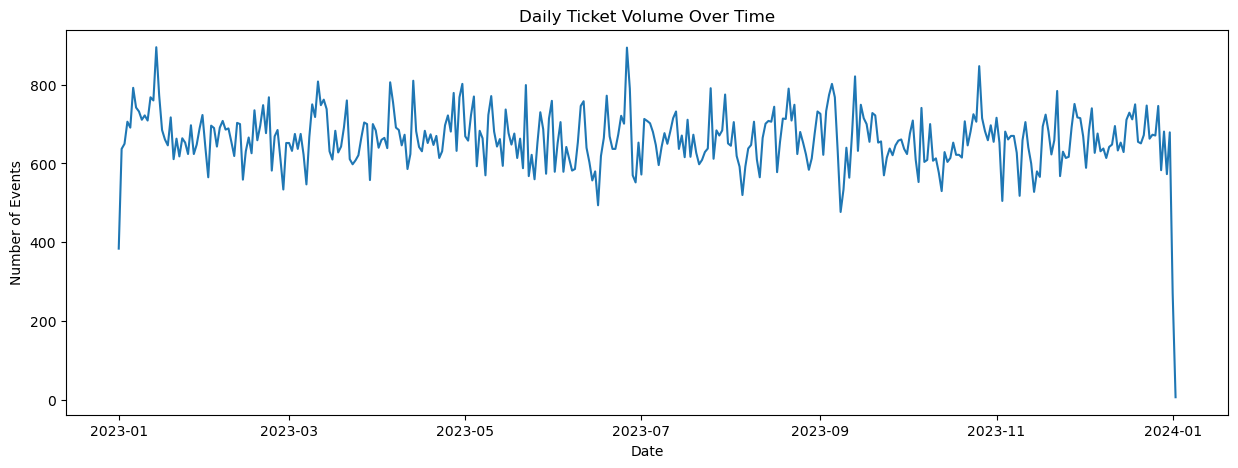

In [260]:
# Ticket Volume Over Time
data['Timestamp'] = pd.to_datetime(data['Timestamp'], dayfirst=True)

daily_volume = data.groupby(data['Timestamp'].dt.date).size()

plt.figure(figsize=(15,5))
daily_volume.plot()
plt.title('Daily Ticket Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

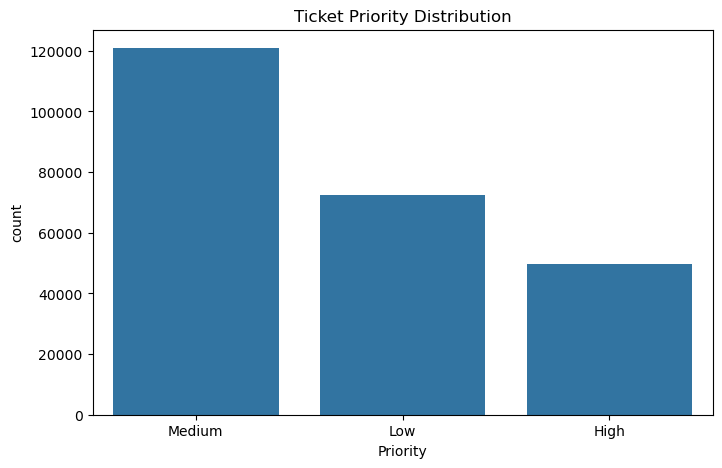

In [261]:
# Priority Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Priority', order=data['Priority'].value_counts().index)
plt.title('Ticket Priority Distribution')

plt.show()

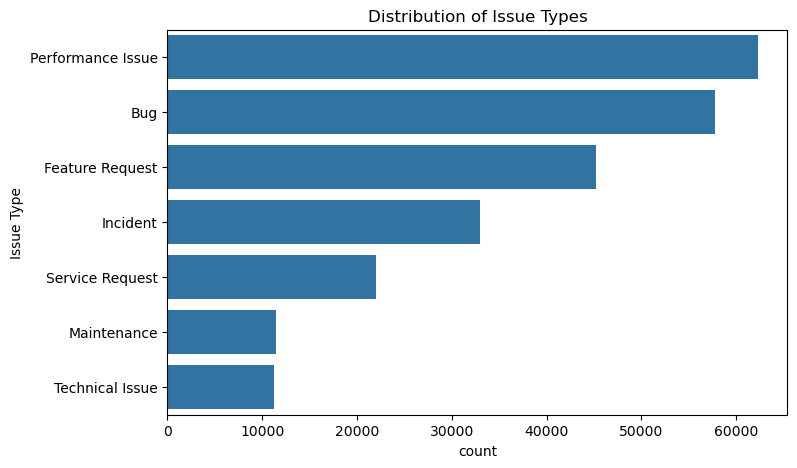

In [262]:
# Issue Type Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=data, y='Issue Type', order=data['Issue Type'].value_counts().index)
plt.title('Distribution of Issue Types')
plt.show()


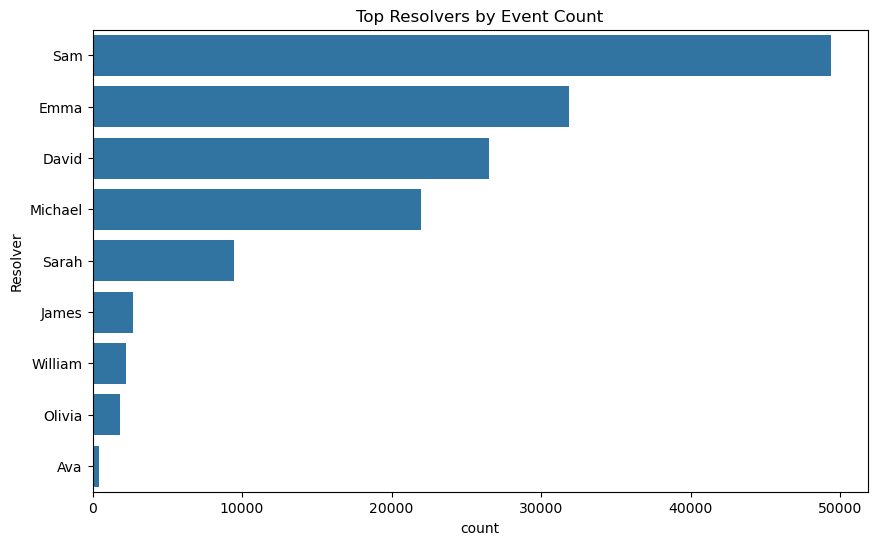

In [263]:
# Resolver Acitivty Levels

plt.figure(figsize=(10,6))
sns.countplot(data=data, y='Resolver', order=data['Resolver'].value_counts().index[:20])
plt.title('Top Resolvers by Event Count')
plt.show()


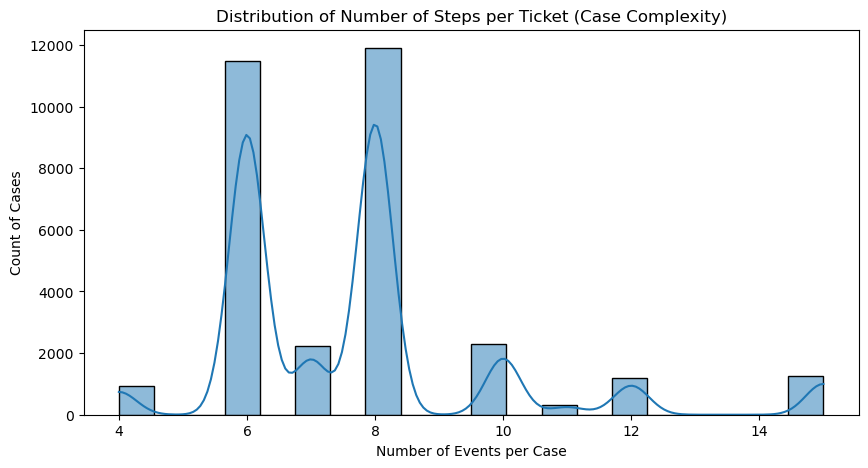

In [264]:
# Number of Steps per case
case_steps = data.groupby('Case ID').size()

plt.figure(figsize=(10,5))
sns.histplot(case_steps, bins=20, kde=True)
plt.title('Distribution of Number of Steps per Ticket (Case Complexity)')
plt.xlabel('Number of Events per Case')
plt.ylabel('Count of Cases')
plt.show()


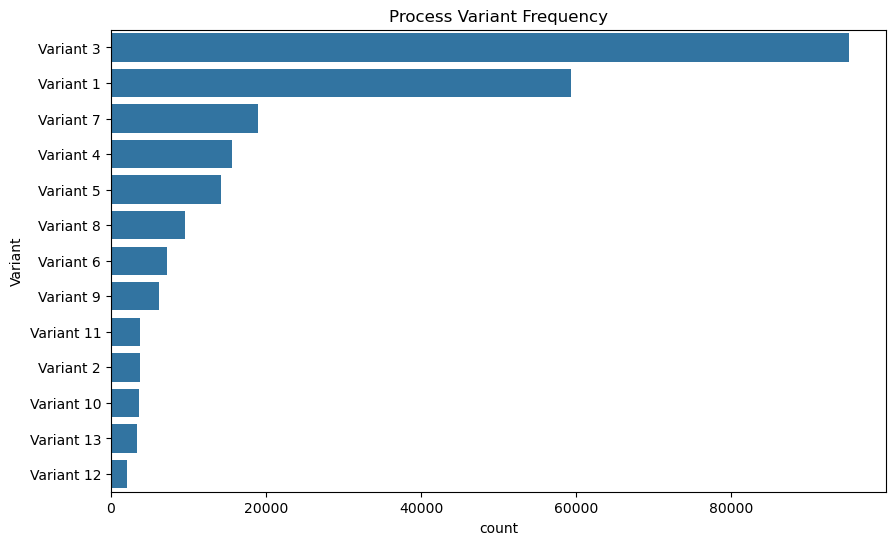

In [265]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, y='Variant', order=data['Variant'].value_counts().index)
plt.title('Process Variant Frequency')
plt.show()


## Data Preparation

### Clean Data

In [266]:
# make a copy of the data to clean
cleaned_data = data.copy()

In [267]:
# conver timestamp to datetime
cleaned_data['Timestamp'] = pd.to_datetime(cleaned_data['Timestamp'], dayfirst=True)

In [268]:
# sort data by Case ID and Timestamp
cleaned_data = cleaned_data.sort_values(['Case ID', 'Timestamp'])

In [269]:
# validate and clean missing values
cleaned_data['Resolver'] = cleaned_data['Resolver'].fillna('Unassigned')

# count null values after cleaning
print(cleaned_data.isnull().sum().sort_values())

Case ID                  0
Variant                  0
Priority                 0
Reporter                 0
Timestamp                0
Event                    0
Issue Type               0
Resolver                 0
Report Channel           0
Short Description        0
Customer Satisfaction    0
dtype: int64


In [270]:
# strip whitespace from categorical columns
categorical_cols = ['Priority','Variant','Issue Type','Event','Report Channel','Reporter','Resolver']
for col in categorical_cols:
    cleaned_data[col] = cleaned_data[col].astype(str).str.strip()

In [271]:
# 5. Remove duplicates
cleaned_data = cleaned_data.drop_duplicates()

In [272]:
cleaned_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 242901 entries, 0 to 77163
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Case ID                242901 non-null  object        
 1   Variant                242901 non-null  object        
 2   Priority               242901 non-null  object        
 3   Reporter               242901 non-null  object        
 4   Timestamp              242901 non-null  datetime64[ns]
 5   Event                  242901 non-null  object        
 6   Issue Type             242901 non-null  object        
 7   Resolver               242901 non-null  object        
 8   Report Channel         242901 non-null  object        
 9   Short Description      242901 non-null  object        
 10  Customer Satisfaction  242901 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 22.2+ MB


In [273]:
cleaned_data.head(7)


,Case ID,Variant,Priority,Reporter,Timestamp,Event,Issue Type,Resolver,Report Channel,Short Description,Customer Satisfaction
0,INC0001,Variant 4,Medium,Alice,2023-11-17 11:17:00,Ticket created,Performance Issue,Unassigned,Website,Application crash,3
1,INC0001,Variant 4,Medium,Alice,2023-11-17 13:30:00,Ticket assigned to level 1 support,Performance Issue,Sam,Website,Application crash,3
2,INC0001,Variant 4,Medium,Alice,2023-11-17 14:06:00,WIP - level 1 support,Performance Issue,Sam,Website,Application crash,3
3,INC0001,Variant 4,Medium,Alice,2023-11-17 16:52:00,Level 1 escalates to level 2 support,Performance Issue,Michael,Website,Application crash,3
4,INC0001,Variant 4,Medium,Alice,2023-11-17 18:07:00,WIP - level 2 support,Performance Issue,Emma,Website,Application crash,3
5,INC0001,Variant 4,Medium,Alice,2023-11-17 20:10:00,Ticket solved by level 2 support,Performance Issue,Sarah,Website,Application crash,3
6,INC0001,Variant 4,Medium,Alice,2023-11-17 21:28:00,Ticket closed,Performance Issue,Unassigned,Website,Application crash,3
